# Lesson 4: Data Visualization and Exploratory Data Analysis

In order to use this file, please do the following:
*   Go to the top left corner of Google Colab and click  `File -> Save a copy in Drive`

Here's a rough overview of our plan for the weekly curriculum:

* Week 2: Introduction to Python and OOP
* Week 3: How to Code Like a Pro
* Week 4: Data Preparation and Cleaning
* **Week 5: Data Visualization and Exploratory Data Analysis**
* Week 6: Miscallenous Topics: Command Line, Pathing, and GitHub
* Week 7: Introduction to Machine Learning
* Week 8: Advanced Topics in Machine Learning
* Week 9: How to Succeed Going Forward

#Outline




1. What is exploratory data analysis (EDA)?
2. Data exploration
 * Aggregation
 * Group operations
 * Application questions revisited
3. Data visualization
  * Matplotlib
    * Anatomy
    * Types of plots
  * Seaborn

Today, we're going to introduce the next section of the data science process: data exploration and visualization. Now that we've cleaned and processed our data, it's time to find out what the data is really telling us. We're going to be using the movies dataset that you all worked with on the application last month.

Without further ado, let's begin!

---
# 1. What is exploratory data analysis (EDA)?

* "Make your graphs look sexy" - *Nick*
* "Explore your data fs" - *Daniel*
* "A visualization is worth a thousand words" - *Christine Hamakawa, External VP of DSU*

In our previous lesson, we discussed how to retrieve, clean, and process data. As mentioned, this is often the most laborious part of the data science process, but is a crucial one for subsequent steps, especially **exploratory data analysis**. Before building a model based on a dataset, we often use EDA to learn more about the data. Our goals during EDA include:
* Identifying trends within the data
* Testing hypotheses and model assumptions
* Deciding which model(s) to use
* Choosing which variables to use

EDA is a largely open-ended process and how you go about it is really up to you. The best advice we can offer is to *be curious* and ask questions.

We'll be splitting this notebook up into two parts: **data exploration** (i.e., learning about data non-graphically) and **data visualization** (i.e., learning about data graphically). These two processes are the pillars of this step in the process. We'll start off with data exploration below using the movies dataset from the DSU application!

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reading in CSV
url = "https://drive.google.com/file/d/1ktuHZOMoQh29yZj0-LzOLhCr4XJvU2MV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]
df = pd.read_csv(path)
df.head()

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Runtime (in mins),License,Release Year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,Action,138,PG-13,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,Action,181,PG-13,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,Action,162,PG-13,2009
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,Action,134,NaN,2018
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,Action,149,NaN,2018


In [ ]:
# Shape of the dataset
df.shape

(918, 10)

In [ ]:
# What columns (variables) are we working with?
df.columns

Index(['Title', 'Movie Info', 'Distributor', 'Domestic Sales (in $)',
       'International Sales (in $)', 'World Sales (in $)', 'Genre',
       'Runtime (in mins)', 'License', 'Release Year'],
      dtype='object')

---

# 2. Data Exploration

The main methods of data exploration are *aggregation* and *group operations* (such as split-apply-combine).

## Aggregation

**Aggregation** is any operation that converts an array (a list of values) into a scalar (a single value). Common examples are the length, mean, minimum, maximum, and sum of a column.

`.describe()` is a useful DataFrame method that returns detailed summary statistics about the `DataFrame` it is called on. 

Note: Because the summary statistics are for numerical data, the summary statistics are only computed for the columns with numerical data.

In [ ]:
df.describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Runtime (in mins),Release Year
count,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,918.00000
mean,1.677469e+08,2.301434e+08,3.968668e+08,116.570806,2006.53268
std,1.040360e+08,2.176011e+08,3.082629e+08,20.875727,9.77481
min,8.036084e+07,2.600000e+02,8.160000e+07,76.000000,1937.00000
25%,1.016071e+08,8.845620e+07,2.005564e+08,100.000000,2001.00000
50%,1.321351e+08,1.638819e+08,3.019416e+08,115.000000,2008.00000
75%,1.913905e+08,2.885577e+08,4.750718e+08,130.000000,2014.00000
max,9.366622e+08,2.086739e+09,2.847246e+09,201.000000,2021.00000


However, we may not be interested in all of these summary statistics. Instead, we can call the `.agg()` method on the `DataFrame` and pass in a list of strings specifying which summary statistics we want to compute. For example, if we want only the mean and standard deviation, then we do the following.

In [ ]:
df.agg(['mean', 'std', 'median'])

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Runtime (in mins),Release Year
mean,1.677469e+08,2.301434e+08,3.968668e+08,116.570806,2006.53268
std,1.040360e+08,2.176011e+08,3.082629e+08,20.875727,9.77481
median,1.321351e+08,1.638819e+08,3.019416e+08,115.000000,2008.00000


We can also pass in a `dict` that allows us more control over which summary statistics are computed *by column*.

In [ ]:
df.agg({'Domestic Sales (in $)':['mean', 'std', 'median', 'min', 'max'], 'Release Year':['min', 'max']})

,Domestic Sales (in $),Release Year
mean,1.677469e+08,NaN
std,1.040360e+08,NaN
median,1.321351e+08,NaN
min,8.036084e+07,1937.0
max,9.366622e+08,2021.0


For the above, the standard deviation makes sense to compute for the total domestic sales, but not necessarily the year. From this output, we also get some useful and interpretable information.
* This dataset only contains movies released during 1937 and 2021
* The mean domestic sales are higher than the median domestic sales, which may indicate that very high-grossing movies skew the distribution of this variable (we can assess this graphically later!)

Another useful Series method is `.value_counts()`, which we introduced in the previous lesson. Recall that this allows us to tabulate the number of observations in each category for a categorical variable.

In [ ]:
df['Release Year'].value_counts()[:5]

2014    46
2013    44
2010    42
2011    38
2018    38
Name: Release Year, dtype: int64

This is all really intuitive and insightful, but how can we aggregate over a *subset* of a `DataFrame`?

--- 

## Group Operations

The answer are **group operations**. These are a more general type of aggregation that allow us to apply various aggregation methods to different groups within a dataset.

Group operations are also called the **split-apply-combine** strategy. It is named as such because the process is as follows:
1. *Split* the data into several groups based on some variable criteria
2. *Apply* an aggregation method to each of these groups
3. *Combine* the resultant summary statistics into a new `DataFrame`

Let's look at group operations in action. We can use the `.groupby()` method, which creates a `pd.GroupBy` object. For instance, we can group by movie distributor (or studio).

In [ ]:
grouped = df.groupby('Distributor')
grouped

The `pd.GroupBy` object has several attributes and methods (which you may recall from Lesson 1 are inherent to *classes*). The `groups` attribute is a `dict` where each group is a key and the values are the row indices associated with each group.

In [ ]:
grouped.groups

{'20th Century Studios': [529], 'Artisan Entertainment': [411], 'Columbia Pictures': [137, 269, 408, 519, 680, 847, 892], 'Dimension Films': [599, 614, 669, 693, 795, 813, 840], 'DreamWorks': [38, 55, 72, 74, 143, 175, 182, 183, 219, 261, 315, 354, 372, 378, 498, 552, 606, 665, 666, 691, 747], 'DreamWorks Distribution': [22, 112, 179, 227, 238, 318, 333, 348, 473, 474, 640, 656, 692, 701, 786, 794, 848], 'FilmDistrict': [731, 870], 'Focus Features': [741, 881], 'Fox Searchlight Pictures': [401, 409, 638, 889], 'IFC Films': [140], 'Lionsgate': [26, 34, 59, 97, 103, 296, 314, 364, 365, 456, 469, 546, 555, 668, 780, 799, 830, 846, 852], 'Metro-Goldwyn-Mayer (MGM)': [289, 316, 332, 335, 494, 507, 518, 574, 644, 743, 805, 875], 'Miramax': [298, 346, 426, 595, 628, 673, 718, 742, 748], 'New Line Cinema': [45, 57, 78, 162, 190, 198, 206, 273, 410, 415, 439, 490, 539, 549, 725, 750, 885, 887, 894, 913, 916], 'Newmarket Films': [47], 'Orion Pictures': [245, 424, 465], 'Paramount Pictures': [6, 

We can directly access a group by name using the `.get_group()` method. The result is a `DataFrame` in which only the movies by the specified distributor appear.

In [ ]:
grouped.get_group('Columbia Pictures')

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Runtime (in mins),License,Release Year
137,Ghostbusters (1984),Three parapsychologists forced out of their un...,Columbia Pictures,243578797,53000000,296578797,Action,105,NaN,1984
269,Tootsie (1982),"Michael Dorsey, an unsuccessful actor, disguis...",Columbia Pictures,177200000,177200000,177200000,Comedy,116,NaN,1982
408,A Few Good Men (1992),Military lawyer Lieutenant Daniel Kaffee defen...,Columbia Pictures,141340178,101900000,243240178,Drama,138,R,1992
519,City Slickers (1991),"On the verge of turning 40, an unhappy Manhatt...",Columbia Pictures,124033791,55000000,179033791,Comedy,113,NaN,1991
680,In the Line of Fire (1993),Secret Service agent Frank Horrigan (Clint Eas...,Columbia Pictures,102314823,74682345,176997168,Action,128,R,1993
847,Stripes (1981),Two friends who are dissatisfied with their jo...,Columbia Pictures,85297000,85297000,85297000,Comedy,106,NaN,1981
892,Bram Stoker's Dracula (1992),The centuries old vampire Count Dracula comes ...,Columbia Pictures,82522790,133339902,215862692,Drama,128,R,1992


The `GroupBy` object also has the familiar aggregation methods like `.sum()`, `.mean()`, and `.count()`.

In [ ]:
grouped.mean()[:5]

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Runtime (in mins),Release Year
Distributor,,,,,
20th Century Studios,1.216266e+08,2.098772e+08,3.315038e+08,115.000000,2021.000000
Artisan Entertainment,1.405391e+08,1.081000e+08,2.486391e+08,81.000000,1999.000000
Columbia Pictures,1.366125e+08,9.720275e+07,1.963157e+08,119.142857,1987.857143
Dimension Films,9.883934e+07,7.587568e+07,1.747150e+08,99.714286,2001.000000
DreamWorks,1.924073e+08,3.034487e+08,4.958560e+08,104.666667,2008.761905


When we do this, we notice that the group (Distributor) becomes the index of the `DataFrame`. To avoid this, we can combine the aggregation method with the `.reset_index()` method.

In [ ]:
grouped.sum().reset_index()[:5]

,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Runtime (in mins),Release Year
0,20th Century Studios,121626598,209877159,331503757,115,2021
1,Artisan Entertainment,140539099,108100000,248639099,81,1999
2,Columbia Pictures,956287379,680419247,1374209626,834,13915
3,Dimension Films,691875387,531129726,1223005113,698,14007
4,DreamWorks,4040554079,6372421823,10412975902,2198,42184


You can also use `.agg()` to aggregate summary statistics.

In [ ]:
stats = grouped.agg({'Runtime (in mins)':['min', 'max'], 'Distributor':['count']})
stats[:5]

Runtime (in mins)      Distributor
                                    min  max       count
Distributor                                             
20th Century Studios                115  115           1
Artisan Entertainment                81   81           1
Columbia Pictures                   105  138           7
Dimension Films                      83  120           7
DreamWorks                           83  154          21

Note that this introduces a `MultiIndex` object for the columns. We don't have time to cover this, but you can sort of think of them as nested column names.

In [ ]:
stats.columns

MultiIndex([('Runtime (in mins)',   'min'),
            ('Runtime (in mins)',   'max'),
            (      'Distributor', 'count')],
           )

Awesome, that concludes our introduction to aggregation and group operations! Let's use what we've learned so far to answer the DSU application questions that you're all familiar with!

---
## Application Questions Revisited

1. Which movie has the highest domestic sales in this dataset?
2. What *proportion* of movies in this dataset have a runtime of at least 2 hours? Round your answer to three decimal places.
3. What is the shortest (by runtime) Disney movie in this dataset?
4. What is the mean runtime of Paramount Pictures movies that were released in 2006 or later? Round your answer to the nearest integer.

**1. Which movie has the highest domestic sales in this dataset?**

In [ ]:
df_sorted_by_domestic = df.sort_values(by='Domestic Sales (in $)', ascending=False)
df_sorted_by_domestic['Title'].iloc[0]

'Star Wars: Episode VII - The Force Awakens (2015)'

**2. What proportion of movies in this dataset have a runtime of at least 2 hours? Round your answer to three decimal places.**

In [ ]:
prop = len(df[df['Runtime (in mins)'] >= 120]) / len(df)
round(prop, 3)

0.406

**3. What is the shortest (by runtime) Disney movie in this dataset?**

In [ ]:
disney_df = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures'].sort_values(by='Runtime (in mins)')
disney_df['Title'].iloc[0]

'Lady and the Tramp (1955)'

**4. What is the mean runtime of Paramount Pictures movies that were released in 2006 or later? Round your answer to the nearest integer.**

In [ ]:
paramount_2006_df = df[(df['Distributor'] == 'Paramount Pictures') & (df['Release Year'] >= 2006)]
mean_runtime = paramount_2006_df['Runtime (in mins)'].mean()
round(mean_runtime, 0)

118.0

---
# 3. Data Visualization

We're now going to move on to data visualization! To start with a quote from *Introducing Data Science*:

* "Information becomes much easier to grasp when shown in a picture, therefore you mainly use graphical techniques to gain an understanding of your data and the interactions between variables." 

Creating meaningfully and beautiful visualizations can really make your project stand out to a non-technical audience. Often, they can reveal much more than summary statistics can alone, so make them count!

## Matplotlib

We're going to first introduce `matplotlib`, which is probably the most widely-used 2D plotting library in Python. Colab conveniently has `matplotlib` installed for us already. We can import it with the following command.

In [ ]:
import matplotlib.pyplot as plt

The way you style your plots and which plots you choose to create are ultimately up to you and largely dependent on the project. For now, we're going to introduce how to create a few basic plots.

### Plotting styles

According to the [matplotlib user guide](https://matplotlib.org/3.3.2/tutorials/introductory/usage.html), there are two main ways in which you can make plots in `matplotlib`: 
* *Object-oriented style*: explicitly create figures and axes, and call methods on them
* *pyplot style*: rely on pyplot to automatically create and manage the figures and axes, and use pyplot/`plt` functions for plotting

### Anatomy of a figure

When working with `matplotlib`, the objects you'll mainly be interacting with are `Figure` and `Axes`.

A **`Figure`** is the entire canvas that you'll be working with: basically, the whole figure, including the plot itself, its titles, and the surrounding areas. 

Each `Figure` includes **`Axes`**, which are the parts of the figure which actually contain the plots. You'll most often only be using one `Axes` object per `Figure`, but you can also have multiple `Axes` (for example, a 2x2 grid).

<img src="https://matplotlib.org/3.3.2/_images/anatomy.png" width="650">

When you're only plotting on one set of `Axes`, it can be easiest to just use `plt` style. 

For example, to make a scatterplot using the movies dataset with `Release Year` on the x-axis against `Domestic Sales (in $)` on the y-axis, we can use `plt.scatter()`:

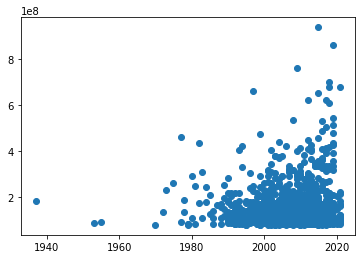

In [ ]:
plt.scatter(x = df['Release Year'], y = df['Domestic Sales (in $)'])
plt.show()

We can also use the `DataFrame` method `corr()`. This returns a correlation matrix which gives the *pairwise correlations* (based on Pearson correlation coefficients) between every numerical variable in the `DataFrame`.

In [ ]:
df.corr()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Runtime (in mins),Release Year
Domestic Sales (in $),1.000000,0.797462,0.904564,0.275915,0.144077
International Sales (in $),0.797462,1.000000,0.976998,0.333963,0.275529
World Sales (in $),0.904564,0.976998,1.000000,0.331670,0.254187
Runtime (in mins),0.275915,0.333963,0.331670,1.000000,0.044698
Release Year,0.144077,0.275529,0.254187,0.044698,1.000000


We can also create a line plot instead of a scatterplot. To do so, we use `plt.plot()` instead of `plt.scatter()`. A simple example is given below.

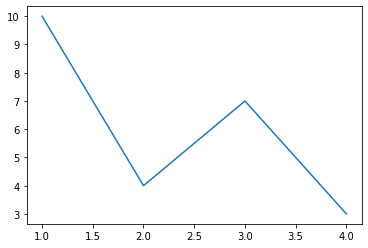

In [ ]:
plt.plot([1, 2, 3, 4], [10, 4, 7, 3])
plt.show()

If we want to make this figure larger, we specify the `figsize` argument (a tuple with two elements) in `plt.figure()`. This line of code *must* come before we call `plt.plot()` or `plt.scatter()`.

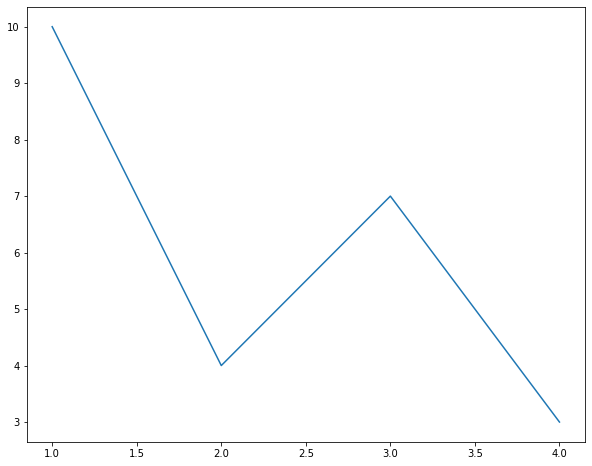

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([1, 2, 3, 4], [10, 4, 7, 3])
plt.show()

Now, back to the first plot we created. Notice that there are no axis labels or a title, and it's a bit small. Let's make this visualization more informative and visually pleasing.

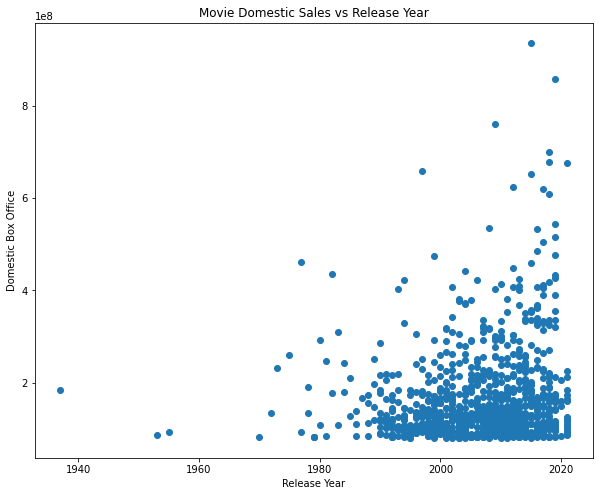

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['Release Year'], df['Domestic Sales (in $)'])
plt.title('Movie Domestic Sales vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Domestic Box Office')
plt.show()

We can customize this even further! We can change the size of labels and styling of our markers as follows.

Note: [Here](https://matplotlib.org/3.5.0/gallery/color/named_colors.html) is the list of named colors in `matplotlib`!

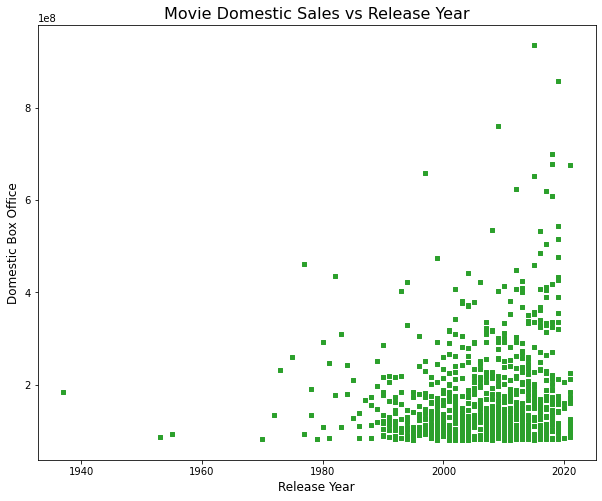

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['Release Year'], df['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s")
plt.title('Movie Domestic Sales vs Release Year', fontsize = 16)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Domestic Box Office', fontsize = 12)
plt.show()

We can also add grid lines by specifying `plt.grid(True`).

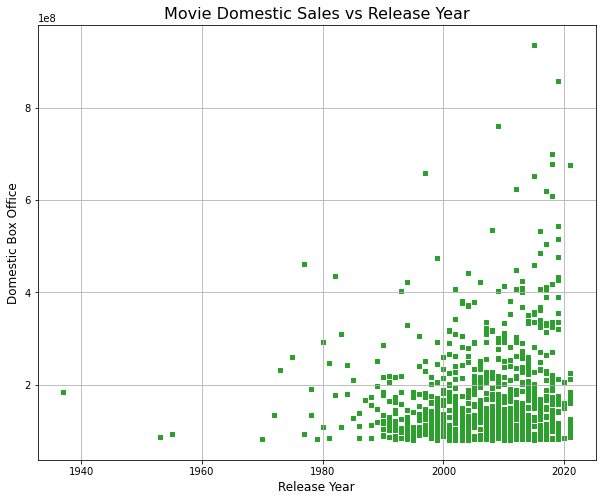

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['Release Year'], df['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s")
plt.title('Movie Domestic Sales vs Release Year', fontsize = 16)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Domestic Box Office', fontsize = 12)
plt.grid(True)
plt.show()

Wat if we want to plot multiple sets of points? To do so, we just call `plt.scatter()` or `plt.plot()` multiple times.

For instance, we want to plot by movie distributor for the 3 distributors with the most movies in this dataset (Warner Bros, Walt Disney Studios Motion Pictures, and Universial Pictures).

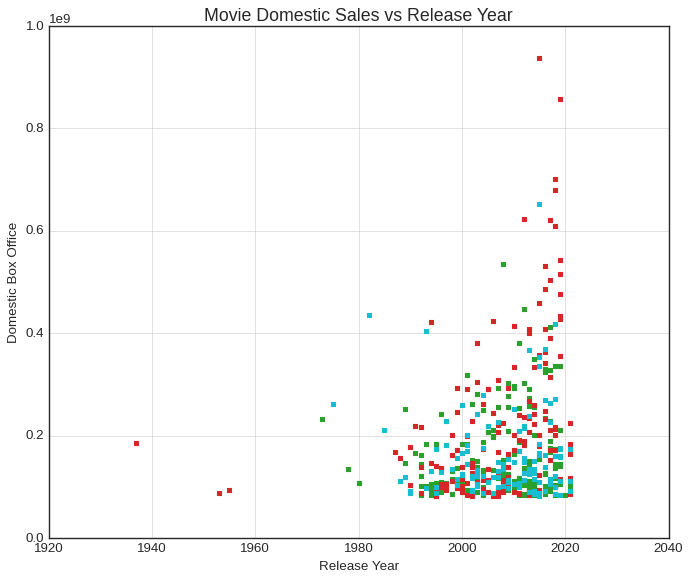

In [ ]:
df_wb = df[df['Distributor'] == 'Warner Bros.']
df_wdsmp = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures']
df_up = df[df['Distributor'] == 'Universal Pictures']

plt.figure(figsize=(10,8))
plt.scatter(df_wb['Release Year'], df_wb['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s")
plt.scatter(df_wdsmp['Release Year'], df_wdsmp['Domestic Sales (in $)'], s = 10, color = "tab:red", marker = "s")
plt.scatter(df_up['Release Year'], df_up['Domestic Sales (in $)'], s = 10, color = "tab:cyan", marker = "s")
plt.title('Movie Domestic Sales vs Release Year', fontsize = 16)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Domestic Box Office', fontsize = 12)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Unless we look at the code, we don't know which distributor each color represents, so we add a legend.

The easiest way to do this is specify `label` argument in each `plt.scatter()` and call `plot.legend()` at the end.

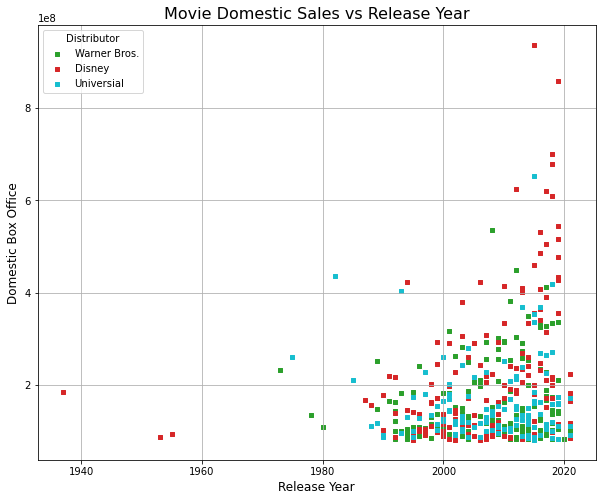

In [ ]:
df_wb = df[df['Distributor'] == 'Warner Bros.']
df_wdsmp = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures']
df_up = df[df['Distributor'] == 'Universal Pictures']

plt.figure(figsize=(10,8))
plt.scatter(df_wb['Release Year'], df_wb['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s", label = "Warner Bros." )
plt.scatter(df_wdsmp['Release Year'], df_wdsmp['Domestic Sales (in $)'], s = 10, color = "tab:red", marker = "s", label = "Disney")
plt.scatter(df_up['Release Year'], df_up['Domestic Sales (in $)'], s = 10, color = "tab:cyan", marker = "s", label = "Universial")
plt.title('Movie Domestic Sales vs Release Year', fontsize = 16)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Domestic Box Office', fontsize = 12)
plt.legend(title = "Distributor")
plt.grid(True)
plt.show()

We can also save these figures by calling `plt.savefig()`. In Colab, we can download these by importing `files` from `google.colab`.

In [ ]:
from google.colab import files

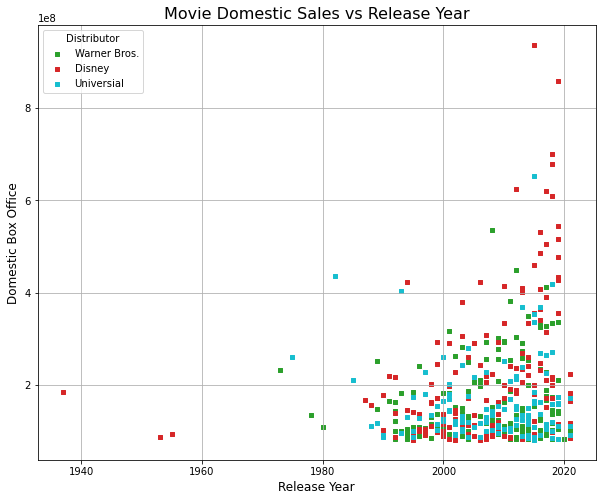

In [ ]:
df_wb = df[df['Distributor'] == 'Warner Bros.']
df_wdsmp = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures']
df_up = df[df['Distributor'] == 'Universal Pictures']

plt.figure(figsize=(10,8))
plt.scatter(df_wb['Release Year'], df_wb['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s", label = "Warner Bros." )
plt.scatter(df_wdsmp['Release Year'], df_wdsmp['Domestic Sales (in $)'], s = 10, color = "tab:red", marker = "s", label = "Disney")
plt.scatter(df_up['Release Year'], df_up['Domestic Sales (in $)'], s = 10, color = "tab:cyan", marker = "s", label = "Universial")
plt.title('Movie Domestic Sales vs Release Year', fontsize = 16)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Domestic Box Office', fontsize = 12)
plt.legend(title = "Distributor")
plt.grid(True)

plt.savefig('myfig.jpg')
# files.download('myfig.jpg')
plt.show()

To create the same plot in object-oriented style, you should use the function `fig, ax = plt.subplots()` to assign your `Figure` and `Axes` objects to `fig` and `ax` respectively, using tuple assignment.

Everything else is very similar, except you use *methods* of these two objects instead of using functions from the `plt` module.

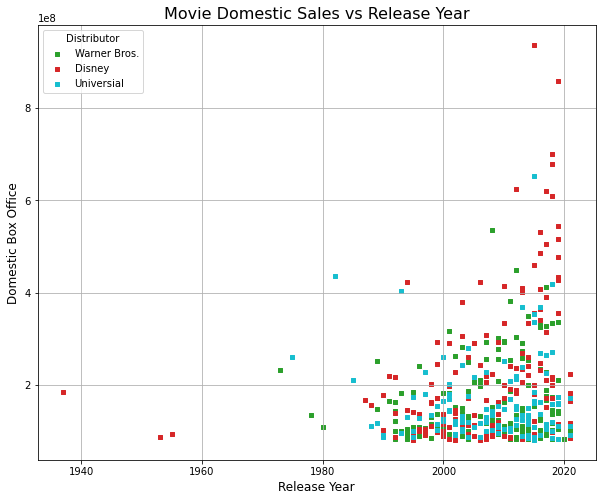

In [ ]:
df_wb = df[df['Distributor'] == 'Warner Bros.']
df_wdsmp = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures']
df_up = df[df['Distributor'] == 'Universal Pictures']

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df_wb['Release Year'], df_wb['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s", label = "Warner Bros." )
ax.scatter(df_wdsmp['Release Year'], df_wdsmp['Domestic Sales (in $)'], s = 10, color = "tab:red", marker = "s", label = "Disney")
ax.scatter(df_up['Release Year'], df_up['Domestic Sales (in $)'], s = 10, color = "tab:cyan", marker = "s", label = "Universial")
ax.set_title('Movie Domestic Sales vs Release Year', fontsize = 16)
ax.set_xlabel('Release Year', fontsize = 12)
ax.set_ylabel('Domestic Box Office', fontsize = 12)
ax.legend(title = "Distributor")
ax.grid(True)

fig.savefig('myfig.jpg')
# files.download('myfig.jpg')
fig.show()

Creating plots in object-oriented style is particularly useful for when you want to include multiple subplots in the same figure. To do that, you can specify the number of rows and columns you want in `plt.subplots()`, and it will return an array of `Axes` objects instead of just one.

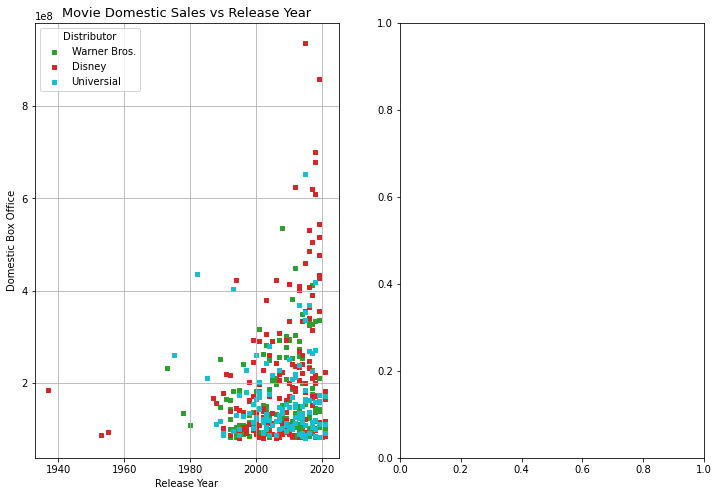

In [ ]:
df_wb = df[df['Distributor'] == 'Warner Bros.']
df_wdsmp = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures']
df_up = df[df['Distributor'] == 'Universal Pictures']

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))

ax1.scatter(df_wb['Release Year'], df_wb['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s", label = "Warner Bros." )
ax1.scatter(df_wdsmp['Release Year'], df_wdsmp['Domestic Sales (in $)'], s = 10, color = "tab:red", marker = "s", label = "Disney")
ax1.scatter(df_up['Release Year'], df_up['Domestic Sales (in $)'], s = 10, color = "tab:cyan", marker = "s", label = "Universial")
ax1.set_title('Movie Domestic Sales vs Release Year', fontsize = 13)
ax1.set_xlabel('Release Year', fontsize = 10)
ax1.set_ylabel('Domestic Box Office', fontsize = 10)
ax1.legend(title = "Distributor")
ax1.grid(True)

fig.savefig('myfig.jpg')
# files.download('myfig.jpg')
fig.show()

By calling all those methods on `ax1`, we can see that we only affected the `Axes` on the left hand side of the figure, leaving a set of blank `Axes` on the right. If we want to graph something else there, we can call methods on `ax2`. For example:

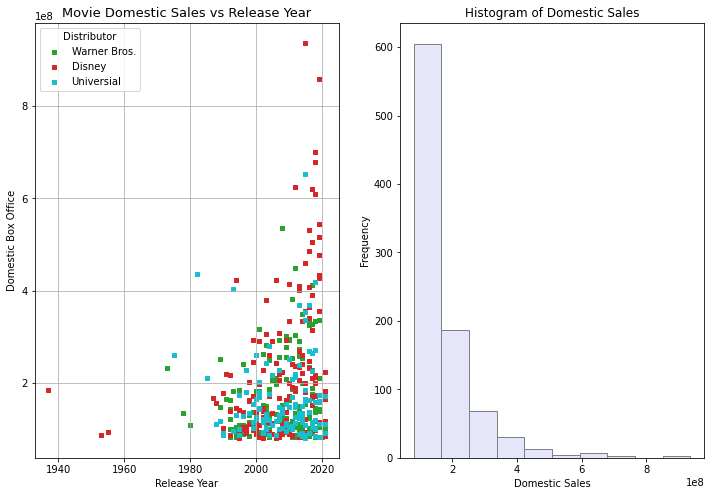

In [ ]:
df_wb = df[df['Distributor'] == 'Warner Bros.']
df_wdsmp = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures']
df_up = df[df['Distributor'] == 'Universal Pictures']

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))

ax1.scatter(df_wb['Release Year'], df_wb['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s", label = "Warner Bros." )
ax1.scatter(df_wdsmp['Release Year'], df_wdsmp['Domestic Sales (in $)'], s = 10, color = "tab:red", marker = "s", label = "Disney")
ax1.scatter(df_up['Release Year'], df_up['Domestic Sales (in $)'], s = 10, color = "tab:cyan", marker = "s", label = "Universial")
ax1.set_title('Movie Domestic Sales vs Release Year', fontsize = 13)
ax1.set_xlabel('Release Year', fontsize = 10)
ax1.set_ylabel('Domestic Box Office', fontsize = 10)
ax1.legend(title = "Distributor")
ax1.grid(True)

ax2.hist(df['Domestic Sales (in $)'], edgecolor = 'tab:gray', color = 'lavender')
ax2.set_title('Histogram of Domestic Sales')
ax2.set_xlabel('Domestic Sales')
ax2.set_ylabel('Frequency')

fig.savefig('myfig.jpg')
# files.download('myfig.jpg')
fig.show()

We can also use different plotting styles. To use these styles, we simply call `plt.style.use()`.

In [ ]:
# List of available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

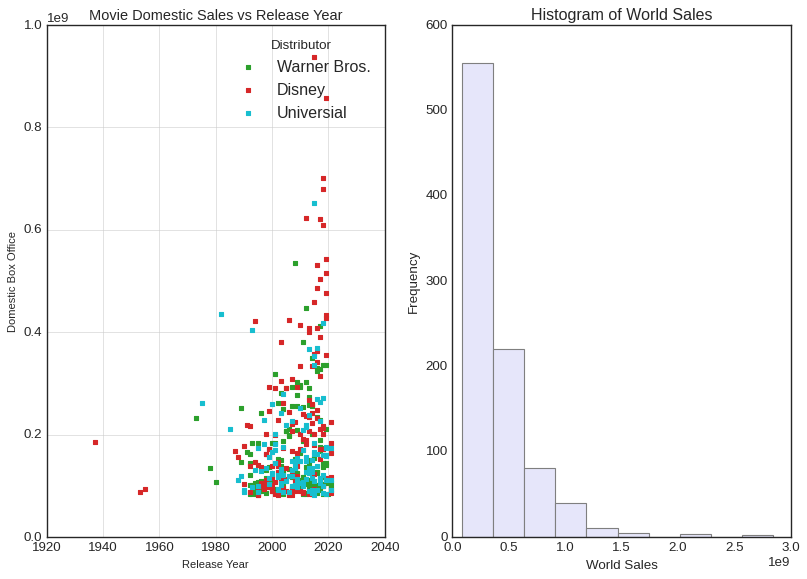

In [ ]:
df_wb = df[df['Distributor'] == 'Warner Bros.']
df_wdsmp = df[df['Distributor'] == 'Walt Disney Studios Motion Pictures']
df_up = df[df['Distributor'] == 'Universal Pictures']

plt.style.use('seaborn-white')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))

ax1.scatter(df_wb['Release Year'], df_wb['Domestic Sales (in $)'], s = 10, color = "tab:green", marker = "s", label = "Warner Bros." )
ax1.scatter(df_wdsmp['Release Year'], df_wdsmp['Domestic Sales (in $)'], s = 10, color = "tab:red", marker = "s", label = "Disney")
ax1.scatter(df_up['Release Year'], df_up['Domestic Sales (in $)'], s = 10, color = "tab:cyan", marker = "s", label = "Universial")
ax1.set_title('Movie Domestic Sales vs Release Year', fontsize = 13)
ax1.set_xlabel('Release Year', fontsize = 10)
ax1.set_ylabel('Domestic Box Office', fontsize = 10)
ax1.legend(title = "Distributor")
ax1.grid(True)

ax2.hist(df['World Sales (in $)'], edgecolor = 'tab:gray', color = 'lavender')
ax2.set_title('Histogram of World Sales')
ax2.set_xlabel('World Sales')
ax2.set_ylabel('Frequency')

fig.savefig('myfig.jpg')
# files.download('myfig.jpg')
fig.show()

---
# Seaborn

We're also going to briefly introduce another package commonly used for 2D visualization called `seaborn`. `seaborn` essentially gives us some additional functions to `matplotlib`. We can import `seaborn` with the following command.

In [ ]:
import seaborn as sns

The first function in `seaborn` that we're going to introduce is `sns.pairplot()`. This helps us understand pairwise relationships in a dataset. From the `seaborn` [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html#:~:text=Plot%20pairwise%20relationships%20in%20a,axes%20across%20a%20single%20column):
* "By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column."

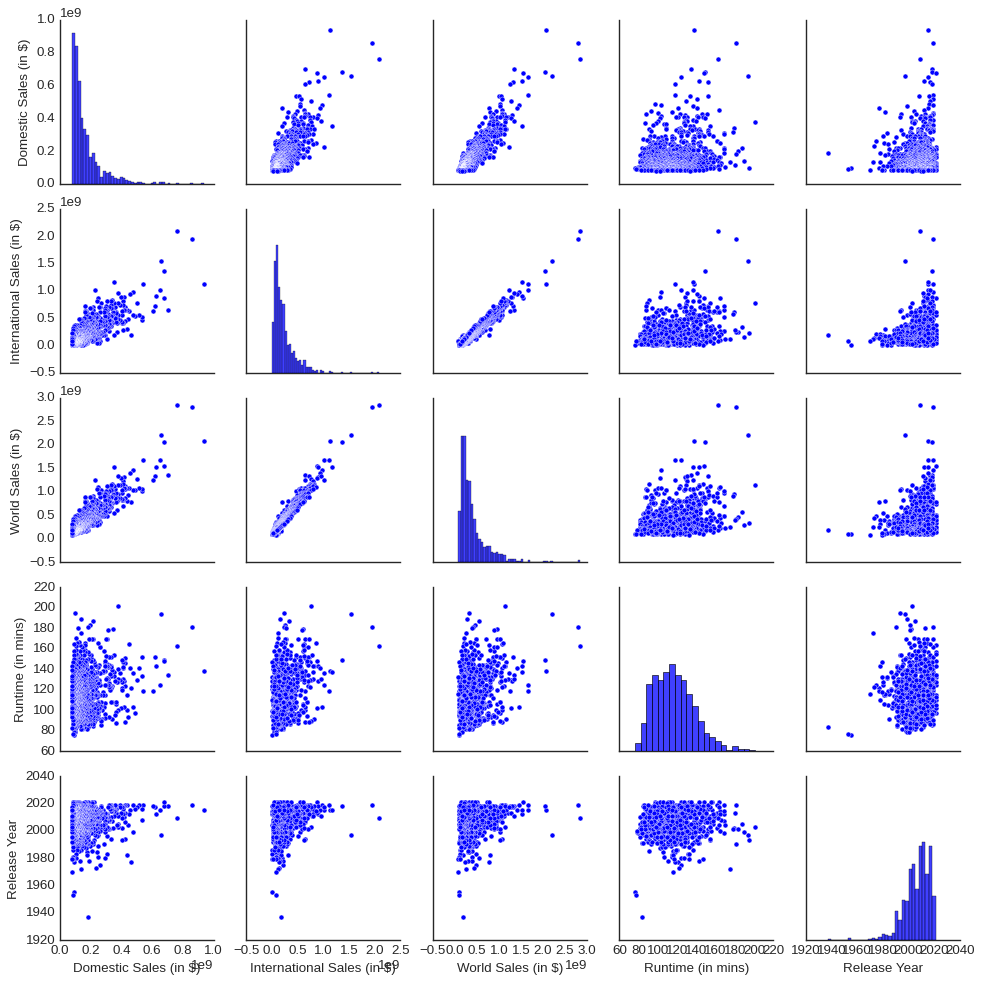

In [ ]:
plt.style.use('seaborn-white')
sns.pairplot(df)
plt.show()

We can also color code the points in the pairplots by a categorical variable using the `hue` argument.

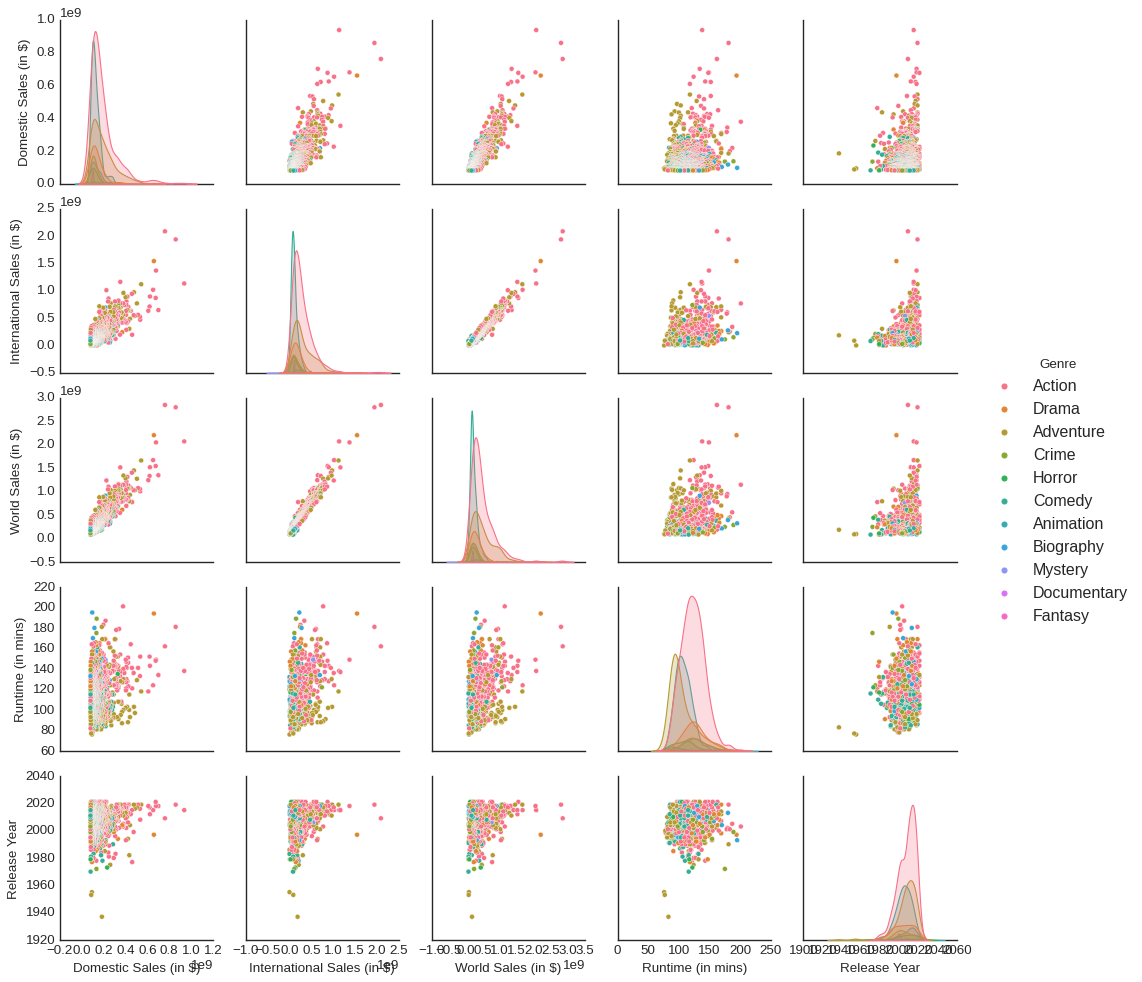

In [ ]:
plt.style.use('seaborn-white')
sns.pairplot(df, hue = 'Genre')
plt.show()

We previously introduced the DataFrame method `.corr()` which calculate the pairwise correlations between every numerical variable in a datset. Seaborn allows us to visualize this correlation matrix in a more intuitive way with `sns.heatmap()`.

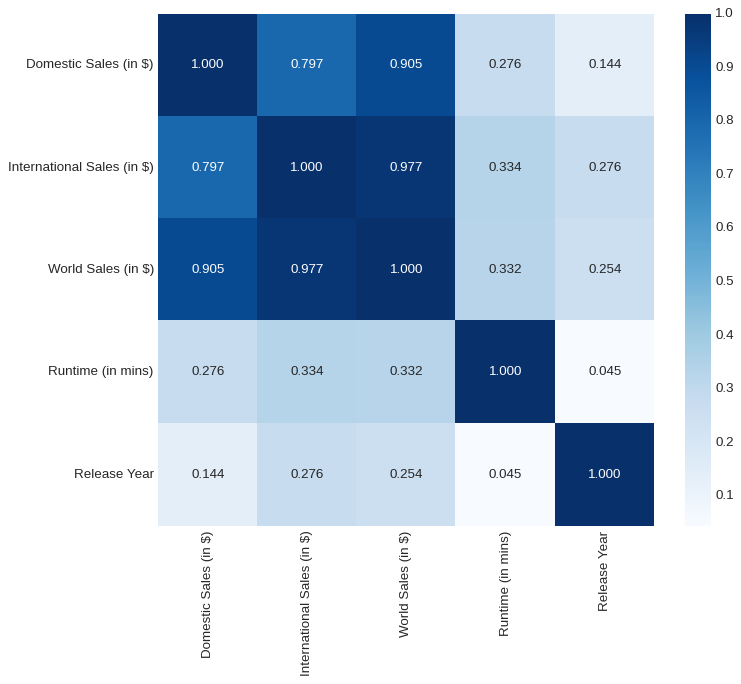

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt='.3f', cmap='Blues')
plt.show()

`seaborn` also allows us to overlay a (linear) line of best fit on a scatterplot using `sns.regplot()`. This line is purely for visualization, however, as we cannot actually extract the regression coefficients.

From the heatmap and pairplot, there seems to be strong correlation between `International Sales (in $)` and `World Sales (in $)`. Let's investigate this below.

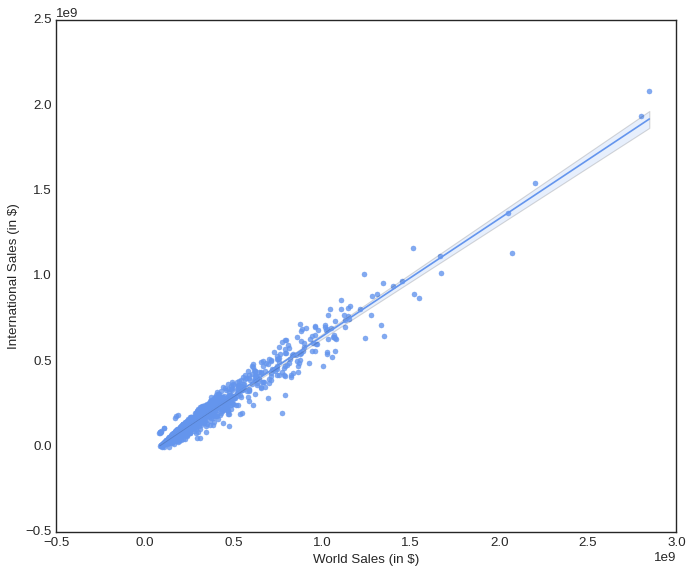

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x = df['World Sales (in $)'], y = df['International Sales (in $)'], color = 'cornflowerblue')
plt.show()

There are **a lot** more types of plots and styling options in both ``seaborn`` and ``matplotlib`` that we don't have enough time to cover. Both of the packages are very well-documented, however, so if you have a certain type of plot in mind that you want to use, there are many resources available online.

As always, *never* feel like you need to know everything now. Nobody knows how to create every type of plot or specify every styling argument, so **search the Internet** as you go along!

---
# Anonymous feedback

If you have any feedback for us, please let us know! The feedback form is completely anonymous, and we promise we'll take your suggestions into consideration for future meetings: https://forms.gle/eve5noVB9ccXbomM7

#Credits

Primary Contributors:
* Daniel Mendelevitch
* Nick Monozon



Secondary Contributors:
*   Sean Tjoa
*   Tristan Dewing
*   Andy Chen
*   Emily Gong
*   Tara Jaigopal

